# Diabetes Prediction Project

In [73]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 

## Phase 1: Exploratory Data Analysis (EDA)

### Load Dataset

In [74]:
diabetes = pd.read_csv("diabetes.csv")

In [75]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [76]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Replace zeros with NaN for unrealistic values


In [77]:
diabetes["Pregnancies"] = diabetes["Pregnancies"].replace(0 , np.nan)
diabetes["Glucose"] = diabetes["Glucose"].replace(0 , np.nan)
diabetes["Insulin"] = diabetes["Insulin"].replace(0 , np.nan)
diabetes["BMI"] = diabetes["BMI"].replace(0 , np.nan)
diabetes["BloodPressure"] = diabetes["BloodPressure"].replace(0 , np.nan)
diabetes["SkinThickness"] = diabetes["SkinThickness"].replace(0 , np.nan)

In [78]:
diabetes.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [79]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,657.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,4.494673,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.217291,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,4.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,7.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Fill NaNs with median based on Outcome


In [80]:
for col in ["Glucose", "Insulin", "BMI", "BloodPressure", "SkinThickness","Pregnancies"]:
    diabetes.loc[diabetes[col].isnull() & (diabetes["Outcome"]==0), col] = diabetes.loc[diabetes["Outcome"]==0, col].median()
    diabetes.loc[diabetes[col].isnull() & (diabetes["Outcome"]==1), col] = diabetes.loc[diabetes["Outcome"]==1, col].median()


In [81]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [82]:
print("The Number of Duplicated Rows: ",diabetes.duplicated().sum())

The Number of Duplicated Rows:  0


### Correlation Analysis

In [83]:
corr = diabetes.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.176302,0.256749,0.141004,0.079835,0.115098,0.000826,0.527049,0.291270
Glucose,0.176302,1.000000,0.225141,0.229289,0.490015,0.236171,0.138353,0.268910,0.495990
BloodPressure,0.256749,0.225141,1.000000,0.199349,0.070128,0.286399,-0.001443,0.325135,0.174469
SkinThickness,0.141004,0.229289,0.199349,1.000000,0.200129,0.566086,0.106280,0.129537,0.295138
Insulin,0.079835,0.490015,0.070128,0.200129,1.000000,0.238443,0.146878,0.123629,0.377081
BMI,0.115098,0.236171,0.286399,0.566086,0.238443,1.000000,0.152771,0.027849,0.315577
DiabetesPedigreeFunction,0.000826,0.138353,-0.001443,0.106280,0.146878,0.152771,1.000000,0.033561,0.173844
Age,0.527049,0.268910,0.325135,0.129537,0.123629,0.027849,0.033561,1.000000,0.238356
Outcome,0.291270,0.495990,0.174469,0.295138,0.377081,0.315577,0.173844,0.238356,1.000000


In [84]:
corr['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.495990
Insulin                     0.377081
BMI                         0.315577
SkinThickness               0.295138
Pregnancies                 0.291270
Age                         0.238356
BloodPressure               0.174469
DiabetesPedigreeFunction    0.173844
Name: Outcome, dtype: float64

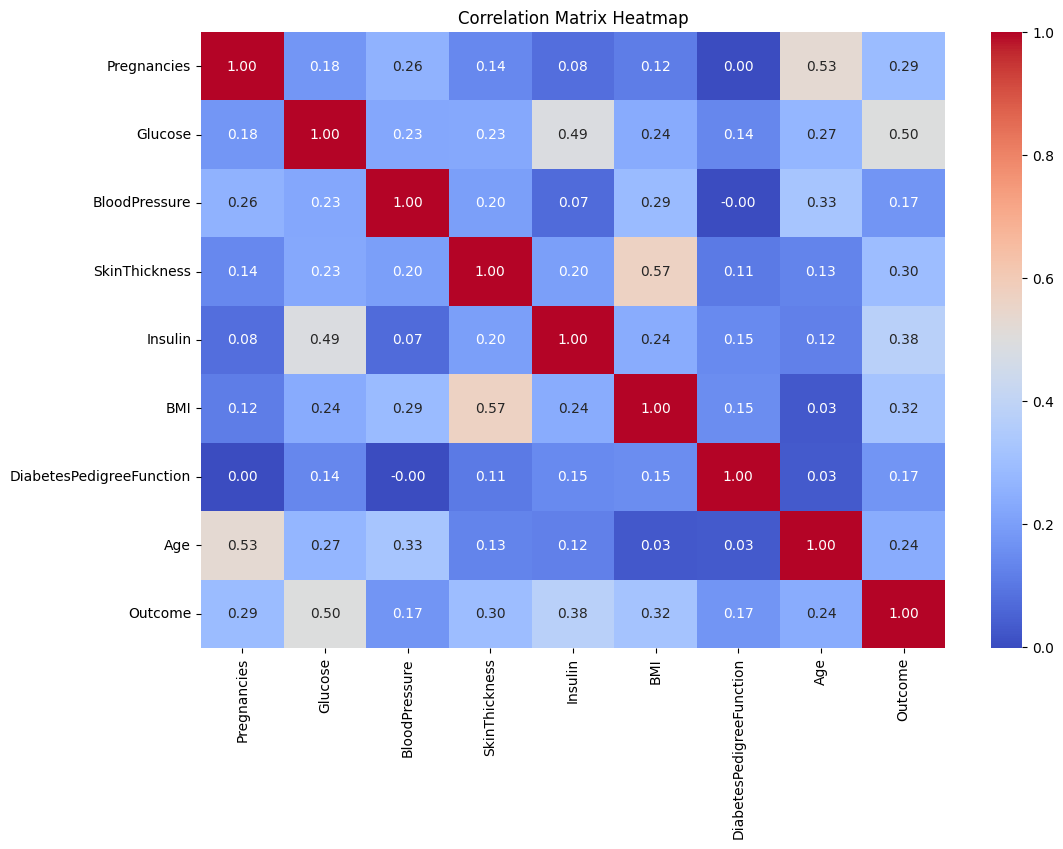

In [85]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

`Glucose`, `BMI`, and `Age` are strongly correlated with diabetes outcome.

### Data Visualization

- #### Outcome Distribution

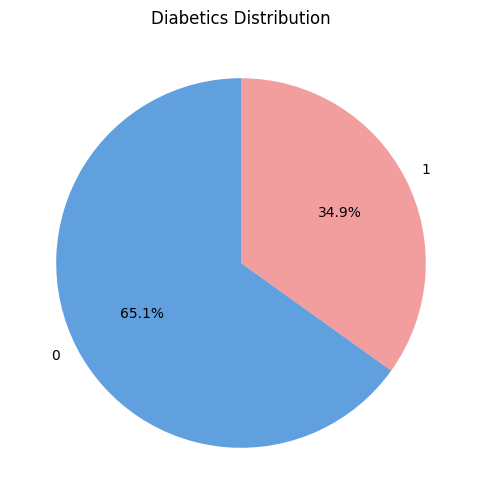

In [86]:
plt.figure(figsize=(6,6))
diabetes['Outcome'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=["#60a0df","#ed7171ae"])
plt.title("Diabetics Distribution")
plt.ylabel("")
plt.show()

- #### Glucose by Outcome:

C:\Users\DELL\AppData\Local\Temp\ipykernel_1960\2306949109.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outcome", y="Glucose", data=diabetes, palette="Set2")


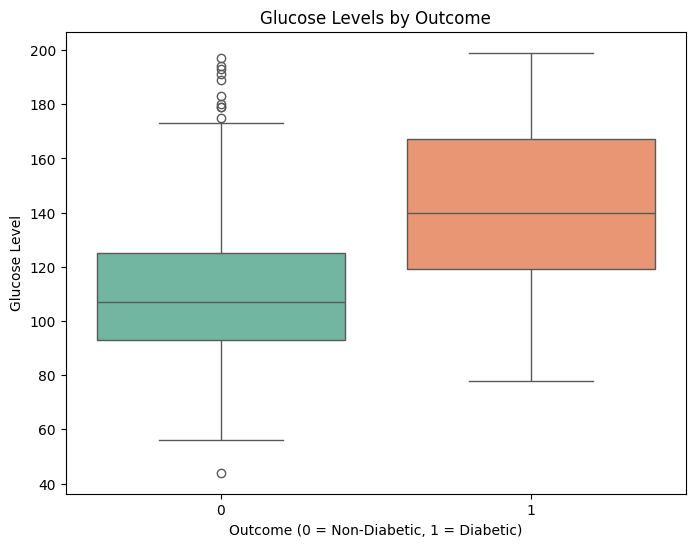

In [87]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Outcome", y="Glucose", data=diabetes, palette="Set2")
plt.title("Glucose Levels by Outcome")
plt.xlabel("Outcome (0 = Non-Diabetic, 1 = Diabetic)")
plt.ylabel("Glucose Level")
plt.show()

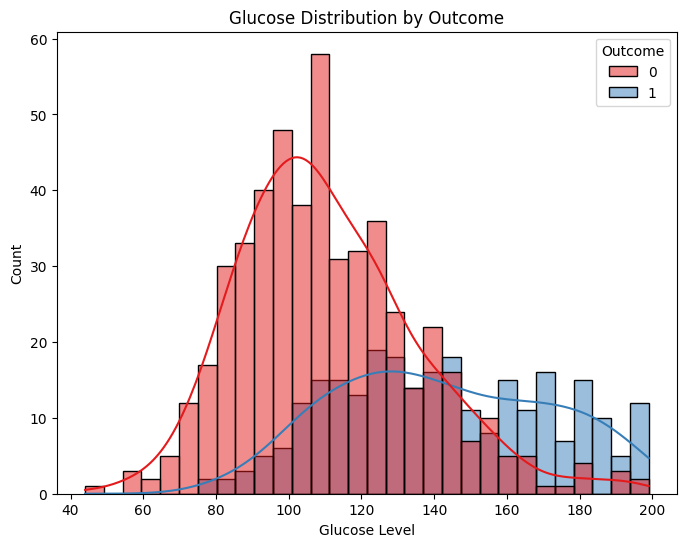

In [88]:
plt.figure(figsize=(8,6))
sns.histplot(data=diabetes, x="Glucose", hue="Outcome", kde=True, bins=30, palette="Set1")
plt.title("Glucose Distribution by Outcome")
plt.xlabel("Glucose Level")
plt.ylabel("Count")
plt.show()

- #### BMI by Outcome:

C:\Users\DELL\AppData\Local\Temp\ipykernel_1960\2952727023.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Outcome", y="BMI", data=diabetes, palette="Set1")


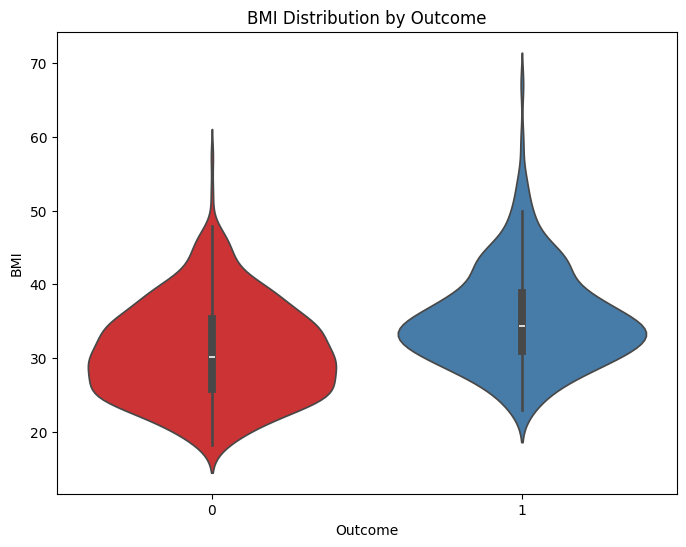

In [89]:
plt.figure(figsize=(8,6))
sns.violinplot(x="Outcome", y="BMI", data=diabetes, palette="Set1")
plt.title("BMI Distribution by Outcome")
plt.xlabel("Outcome")
plt.ylabel("BMI")
plt.show()

- #### Glucose vs BMI Scatter:

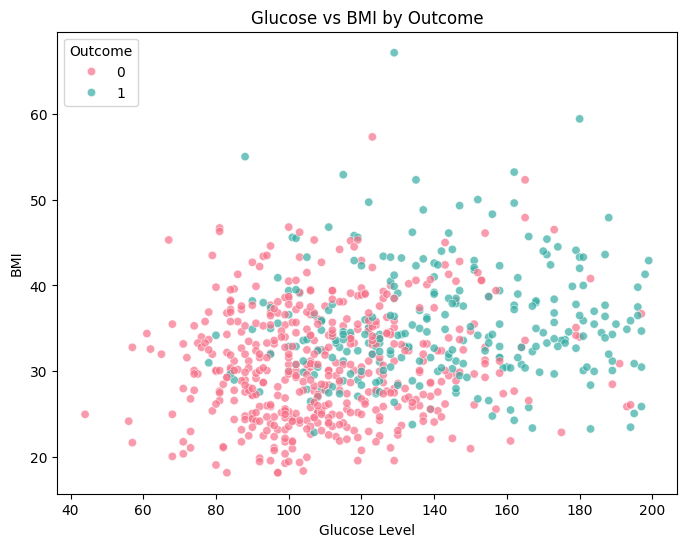

In [90]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=diabetes, x="Glucose", y="BMI", hue="Outcome", palette="husl", alpha=0.7)
plt.title("Glucose vs BMI by Outcome")
plt.xlabel("Glucose Level")
plt.ylabel("BMI")
plt.legend(title="Outcome", loc="upper left")
plt.show()


- #### Age vs Outcome:

C:\Users\DELL\AppData\Local\Temp\ipykernel_1960\1902222061.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outcome", y="Age", data=diabetes, palette="viridis")


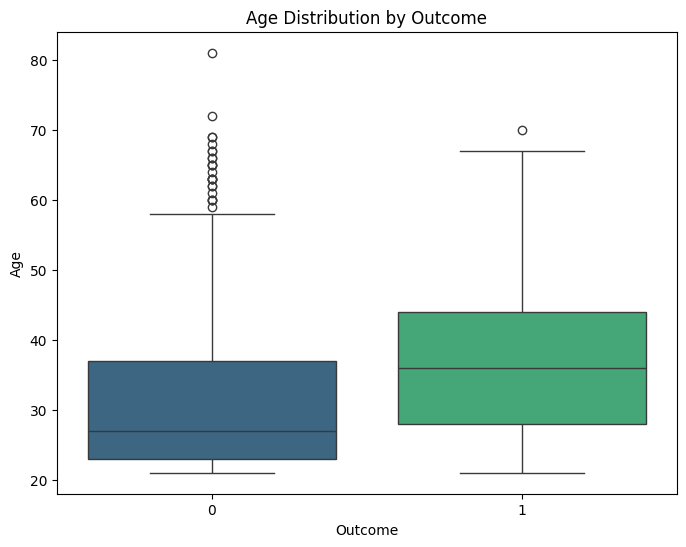

In [91]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Outcome", y="Age", data=diabetes, palette="viridis")
plt.title("Age Distribution by Outcome")
plt.xlabel("Outcome")
plt.ylabel("Age")
plt.show()


- #### Correlation with Outcome:

C:\Users\DELL\AppData\Local\Temp\ipykernel_1960\943949197.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_outcome.values, y=corr_with_outcome.index, palette="viridis")


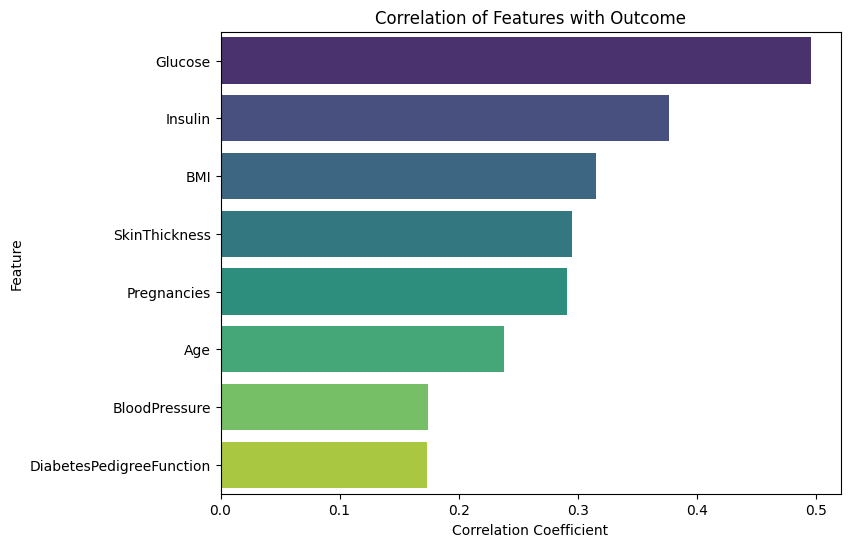

In [92]:
plt.figure(figsize=(8,6))
corr_with_outcome = corr['Outcome'].drop("Outcome").sort_values(ascending=False)
sns.barplot(x=corr_with_outcome.values, y=corr_with_outcome.index, palette="viridis")
plt.title("Correlation of Features with Outcome")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.show()


- #### Pairplot of Key Features:

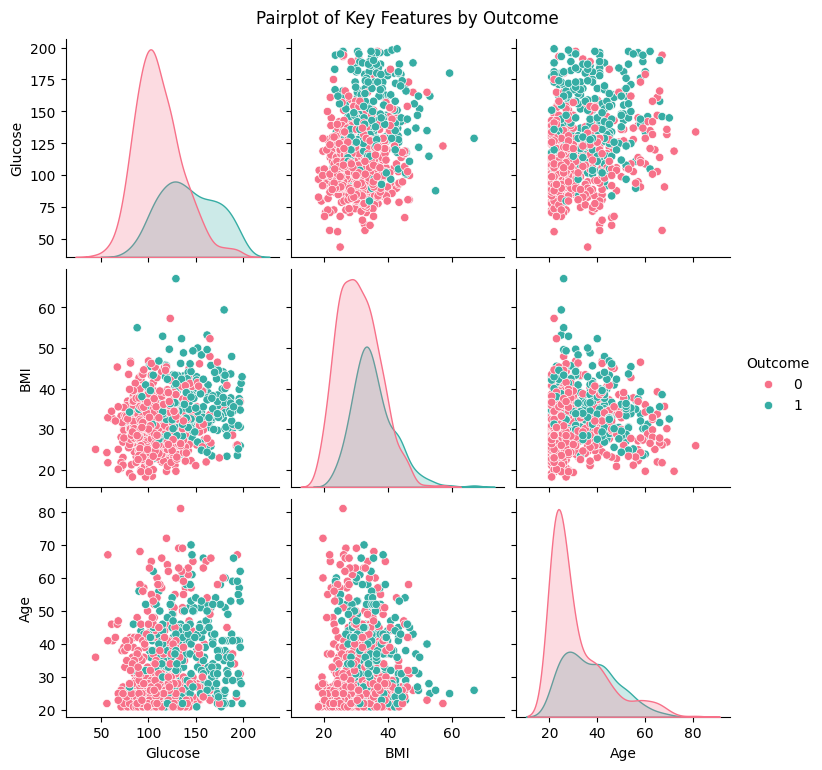

In [93]:
important_features = ["Glucose", "BMI", "Age", "Outcome"]
sns.pairplot(diabetes[important_features], hue="Outcome", palette="husl")
plt.suptitle("Pairplot of Key Features by Outcome", y=1.02)
plt.show()


- #### Diabetes Rate by Age Group

C:\Users\DELL\AppData\Local\Temp\ipykernel_1960\3188079895.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_outcome = diabetes.groupby('AgeGroup')['Outcome'].mean().reset_index()
C:\Users\DELL\AppData\Local\Temp\ipykernel_1960\3188079895.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeGroup', y='Outcome', data=age_outcome, palette='Set2')


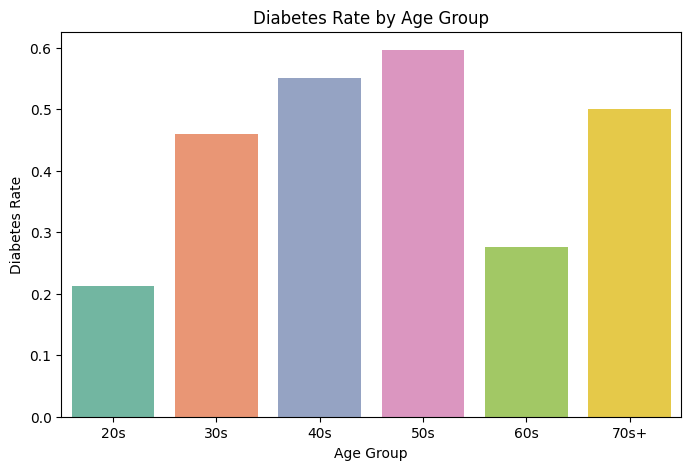

In [94]:
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20s','30s','40s','50s','60s','70s+']
diabetes['AgeGroup'] = pd.cut(diabetes['Age'], bins=bins, labels=labels, right=False)

age_outcome = diabetes.groupby('AgeGroup')['Outcome'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='AgeGroup', y='Outcome', data=age_outcome, palette='Set2')
plt.title("Diabetes Rate by Age Group")
plt.ylabel("Diabetes Rate")
plt.xlabel("Age Group")
plt.show()


- #### Diabetes Rate by Glucose Group

C:\Users\DELL\AppData\Local\Temp\ipykernel_1960\257693531.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  glucose_outcome = diabetes.groupby('Glucose_Group')['Outcome'].mean().reset_index()
C:\Users\DELL\AppData\Local\Temp\ipykernel_1960\257693531.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Glucose_Group', y='Outcome', data=glucose_outcome, palette='Set1')


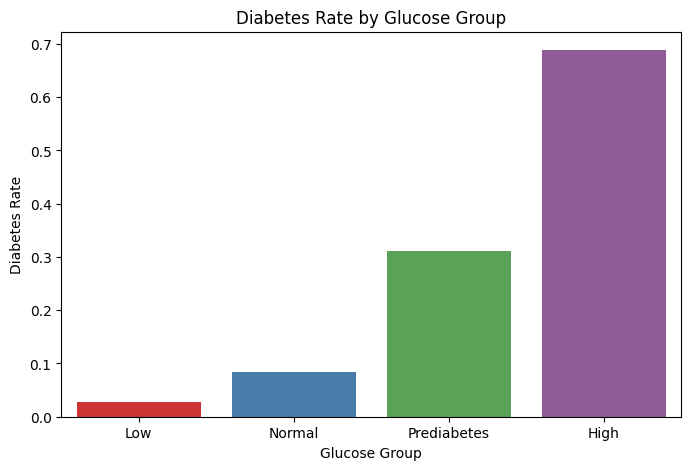

In [95]:
bins = [0, 80, 100, 140, 200]
labels = ['Low','Normal','Prediabetes','High']
diabetes['Glucose_Group'] = pd.cut(diabetes['Glucose'], bins=bins, labels=labels, right=False)

# Group by Glucose
glucose_outcome = diabetes.groupby('Glucose_Group')['Outcome'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='Glucose_Group', y='Outcome', data=glucose_outcome, palette='Set1')
plt.title("Diabetes Rate by Glucose Group")
plt.ylabel("Diabetes Rate")
plt.xlabel("Glucose Group")
plt.show()


- #### Diabetes Rate by Age Group and Glucose Level

C:\Users\DELL\AppData\Local\Temp\ipykernel_1960\1818514146.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_glucose = diabetes.groupby(['AgeGroup','Glucose_Group'])['Outcome'].mean().reset_index()


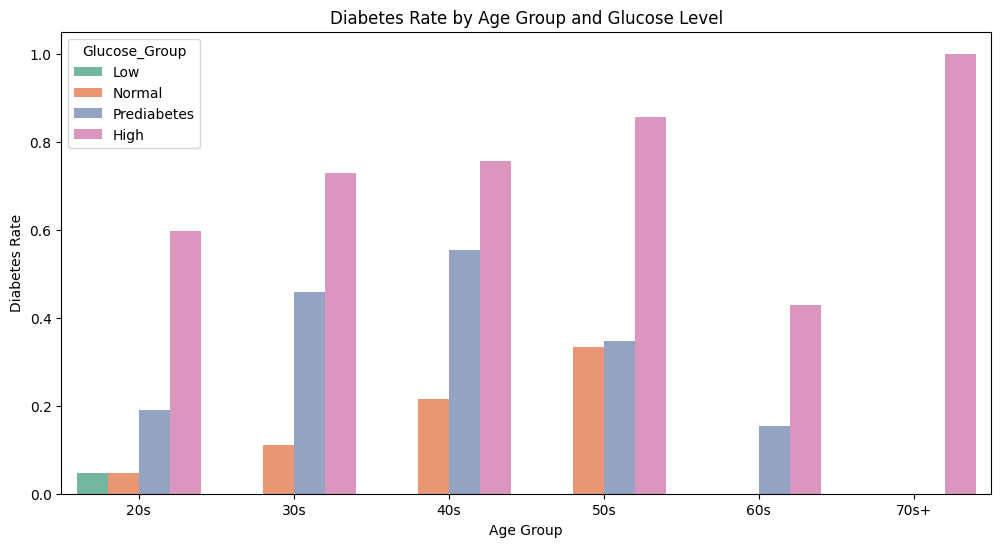

In [96]:
# Group outcome
age_glucose = diabetes.groupby(['AgeGroup','Glucose_Group'])['Outcome'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='AgeGroup', y='Outcome', hue='Glucose_Group', data=age_glucose, palette='Set2')
plt.title("Diabetes Rate by Age Group and Glucose Level")
plt.ylabel("Diabetes Rate")
plt.xlabel("Age Group")
plt.show()


### **Observations**: 
- Diabetics generally have higher glucose levels.

- Higher BMI tends to correlate with diabetes.

- Older patients show higher diabetes prevalence.

- Older age + higher glucose increases diabetes risk.

## Phase 2: Data Preprocessing & Feature Engineering

I enhance the dataset with interaction features to improve predictive power

In [97]:
diabetes.drop(columns=['AgeGroup','Glucose_Group'], inplace=True)

### Feature Engineering

In [98]:
diabetes['Glucose_BMI'] = diabetes['Glucose'] * diabetes['BMI']
diabetes['Glucose_squared'] = diabetes['Glucose'] ** 2
diabetes['BMI_squared'] = diabetes['BMI'] ** 2
diabetes['Glucose_Age'] = diabetes['Glucose'] * diabetes['Age']
diabetes["BMI_DPF"] = diabetes["BMI"] * diabetes["DiabetesPedigreeFunction"]
diabetes["insulin_glucose"] = diabetes["Glucose"] * diabetes["Insulin"]
diabetes["Insulin_Glucose_Ratio"] = diabetes["Insulin"] / diabetes["Glucose"]
diabetes["Insulin_BMI_Ratio"] = diabetes["Insulin"] / diabetes["BMI"]
diabetes["Pregnancies_per_Year"] = diabetes["Pregnancies"] / diabetes["Age"]


diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_BMI,Glucose_squared,BMI_squared,Glucose_Age,BMI_DPF,insulin_glucose,Insulin_Glucose_Ratio,Insulin_BMI_Ratio,Pregnancies_per_Year
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,4972.8,21904.0,1128.96,7400.0,21.0672,25086.0,1.145270,5.044643,0.120000
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,2261.0,7225.0,707.56,2635.0,9.3366,8712.5,1.205882,3.853383,0.032258
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,4263.9,33489.0,542.89,5856.0,15.6576,31018.5,0.926230,7.274678,0.250000
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,2500.9,7921.0,789.61,1869.0,4.6927,8366.0,1.056180,3.345196,0.047619
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,5904.7,18769.0,1857.61,4521.0,98.6128,23016.0,1.226277,3.897912,0.151515


In [99]:
diabetes.corr()['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose_BMI                 0.523209
Glucose                     0.495990
Glucose_squared             0.494007
Glucose_Age                 0.411733
insulin_glucose             0.408689
Insulin                     0.377081
BMI                         0.315577
BMI_squared                 0.300176
SkinThickness               0.295138
Pregnancies                 0.291270
Insulin_BMI_Ratio           0.289746
Pregnancies_per_Year        0.248193
Insulin_Glucose_Ratio       0.246499
Age                         0.238356
BMI_DPF                     0.236011
BloodPressure               0.174469
DiabetesPedigreeFunction    0.173844
Name: Outcome, dtype: float64

### Train-Test Split & Scaling

Dropping weak features `(SkinThickness)` to reduce noise.

In [100]:
from sklearn.model_selection import train_test_split
X = diabetes.drop(['Outcome','SkinThickness'], axis= 1)
y = diabetes['Outcome']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [101]:
train_data = X_train.join(y_train)

In [102]:
test_data = X_test.join(y_test)

In [103]:
from sklearn.preprocessing import RobustScaler

X_train = train_data.drop('Outcome', axis=1)
y_train = train_data['Outcome']
X_test = test_data.drop('Outcome', axis=1)
y_test = test_data['Outcome']

scaler = RobustScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

## Phase 3: Model Training & Hyperparameter Tuning

### Models Used:
- Logistic Regression
- Support Vector Machine (SVM)
- Random Forest
- linear SVC
- XGBoost
- Stacking Classifier
- CatBoost

### Model Evaluation
I focus on multiple metrics:
- `Accuracy`: Overall correctness.
- `Precision`: Correct positive predictions / all positive predictions.
- `Recall`: Correct positive predictions / all actual positives.
- **`Important in medical datasets`**: A high recall ensures we detect most diabetic patients, minimizing false negatives. Missing a diabetic case can have serious consequences, so recall is prioritized over raw accuracy.
- `F1-score`: Balance between precision and recall.
- `AUC`: Ability of the model to distinguish between diabetic and non-diabetic cases.

- #### Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

log_reg = LogisticRegression()
log_reg.fit(X_train_s,y_train)
y_pred_lin = log_reg.predict(X_test_s)

print("Model: LogisticRegression")
print("Accuracy:", accuracy_score(y_test, y_pred_lin))
print(classification_report(y_test, y_pred_lin))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lin))


Model: LogisticRegression
Accuracy: 0.8181818181818182
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        99
           1       0.74      0.76      0.75        55

    accuracy                           0.82       154
   macro avg       0.80      0.81      0.80       154
weighted avg       0.82      0.82      0.82       154

Confusion Matrix:
 [[84 15]
 [13 42]]


In [105]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'], 
    'class_weight': [None, 'balanced']
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=500, solver='liblinear'), 
                       param_grid, cv=5, scoring='recall')
grid_lr.fit(X_train_s, y_train)

print("Best Logistic Regression Params:", grid_lr.best_params_)
print("Best CV Score:", grid_lr.best_score_)
y_pred_lr_tuned = grid_lr.predict(X_test_s)
print("Accuracy on Test:", accuracy_score(y_test, y_pred_lr_tuned))
print(classification_report(y_test, y_pred_lr_tuned))
print(confusion_matrix(y_test, y_pred_lr_tuned))


Best Logistic Regression Params: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2'}
Best CV Score: 0.8638981173864894
Accuracy on Test: 0.7662337662337663
              precision    recall  f1-score   support

           0       0.92      0.70      0.79        99
           1       0.62      0.89      0.73        55

    accuracy                           0.77       154
   macro avg       0.77      0.79      0.76       154
weighted avg       0.81      0.77      0.77       154

[[69 30]
 [ 6 49]]


- #### Support Vector Machine (SVM)

In [106]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_s, y_train)
y_pred_svm = svm_model.predict(X_test_s)

print("Model: Support Vector Machine (SVM)")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


Model: Support Vector Machine (SVM)
Accuracy: 0.8701298701298701
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        99
           1       0.83      0.80      0.81        55

    accuracy                           0.87       154
   macro avg       0.86      0.85      0.86       154
weighted avg       0.87      0.87      0.87       154

Confusion Matrix:
 [[90  9]
 [11 44]]


In [107]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf', 'linear', 'poly'],
    'gamma': ['scale', 'auto'] ,
    'class_weight': [None, 'balanced']
    }
svm = SVC(probability=True, random_state=42)

grid_svm = GridSearchCV(estimator=svm,
                        param_grid=param_grid,
                        cv=5,
                        scoring='recall',  
                        n_jobs=-1
                        )

grid_svm.fit(X_train_s, y_train)

print("Best SVM Params:", grid_svm.best_params_)
print("Best CV Score:", grid_svm.best_score_)

y_pred_svm_tuned = grid_svm.predict(X_test_s)

print("Accuracy on Test:", accuracy_score(y_test, y_pred_svm_tuned))
print(classification_report(y_test, y_pred_svm_tuned))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm_tuned))




Best SVM Params: {'C': 0.1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}
Best CV Score: 0.9155038759689923
Accuracy on Test: 0.8181818181818182
              precision    recall  f1-score   support

           0       0.95      0.76      0.84        99
           1       0.68      0.93      0.78        55

    accuracy                           0.82       154
   macro avg       0.81      0.84      0.81       154
weighted avg       0.85      0.82      0.82       154

Confusion Matrix:
 [[75 24]
 [ 4 51]]


- #### Random Forest

In [108]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_s, y_train)

y_pred_rf = rf_model.predict(X_test_s)

print("Model: Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Model: Random Forest
Accuracy: 0.8636363636363636
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        99
           1       0.79      0.84      0.81        55

    accuracy                           0.86       154
   macro avg       0.85      0.86      0.85       154
weighted avg       0.87      0.86      0.86       154

Confusion Matrix:
 [[87 12]
 [ 9 46]]


In [109]:
rf = RandomForestClassifier(random_state=42)
rf_params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10, 15],
    "min_samples_split": [2, 5, 10]
}
grid_rf = GridSearchCV(rf, rf_params, cv=5, scoring="recall", n_jobs=-1)
grid_rf.fit(X_train_s, y_train)

print("Best RF Params:", grid_rf.best_params_)
print("Best CV Score:", grid_rf.best_score_)

y_pred_rf = grid_rf.predict(X_test_s)
print("\nRandom Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Best RF Params: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Score: 0.8547065337763012

Random Forest Results:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90        99
           1       0.81      0.85      0.83        55

    accuracy                           0.88       154
   macro avg       0.86      0.87      0.87       154
weighted avg       0.88      0.88      0.88       154

Confusion Matrix:
 [[88 11]
 [ 8 47]]


- #### LinearSVC

In [110]:
from sklearn.svm import LinearSVC
svc = LinearSVC(max_iter=5000, random_state=42)
svc_params = {
    "C": [0.01, 0.1, 1, 10],
    "class_weight": [None, "balanced"]
}
grid_svc = GridSearchCV(svc, svc_params, cv=5, scoring="recall", n_jobs=-1)
grid_svc.fit(X_train_s, y_train)

print("\nBest SVC Params:", grid_svc.best_params_)
print("Best CV Score:", grid_svc.best_score_)

y_pred_svc = grid_svc.predict(X_test_s)
print("\nLinear SVC Results:")
print(classification_report(y_test, y_pred_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))


Best SVC Params: {'C': 1, 'class_weight': 'balanced'}
Best CV Score: 0.8499446290143965

Linear SVC Results:
              precision    recall  f1-score   support

           0       0.94      0.75      0.83        99
           1       0.67      0.91      0.77        55

    accuracy                           0.81       154
   macro avg       0.80      0.83      0.80       154
weighted avg       0.84      0.81      0.81       154

Confusion Matrix:
 [[74 25]
 [ 5 50]]


- #### XGBoost

In [111]:
from xgboost import XGBClassifier
xgb_params = {
    'learning_rate': 0.01,
    'max_depth': 4,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'scale_pos_weight': len(y_train[y_train==0])/len(y_train[y_train==1])
}
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')

xgb_model.fit(X_train_s, y_train)
y_pred_xgb = xgb_model.predict(X_test_s)

print("Model: XGBoost")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

Model: XGBoost
Accuracy: 0.8506493506493507
              precision    recall  f1-score   support

           0       0.89      0.88      0.88        99
           1       0.79      0.80      0.79        55

    accuracy                           0.85       154
   macro avg       0.84      0.84      0.84       154
weighted avg       0.85      0.85      0.85       154

Confusion Matrix:
 [[87 12]
 [11 44]]


- #### Stacking Classifier

In [115]:
from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(
    estimators=[('lr', grid_lr.best_estimator_), 
                ('rf', grid_rf.best_estimator_), 
                ('scv', grid_svc.best_estimator_),
                ('xgb', xgb_model)],
    final_estimator=LogisticRegression(max_iter=500),
    cv=5
)

stacking_clf.fit(X_train_s, y_train)
y_pred_stack = stacking_clf.predict(X_test_s)

print("Model: Stacking Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_stack))
print(classification_report(y_test, y_pred_stack))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_stack))
print("-"*50)

Model: Stacking Classifier
Accuracy: 0.8766233766233766
              precision    recall  f1-score   support

           0       0.92      0.89      0.90        99
           1       0.81      0.85      0.83        55

    accuracy                           0.88       154
   macro avg       0.86      0.87      0.87       154
weighted avg       0.88      0.88      0.88       154

Confusion Matrix:
 [[88 11]
 [ 8 47]]
--------------------------------------------------


- #### CatBoost

In [116]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    random_seed=42,
    verbose=0
)

cat_model.fit(X_train_s, y_train)
y_pred_cat = cat_model.predict(X_test_s)

print("Model: CatBoost")
print("Accuracy:", accuracy_score(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_cat))
print("-"*50)

Model: CatBoost
Accuracy: 0.8766233766233766
              precision    recall  f1-score   support

           0       0.91      0.90      0.90        99
           1       0.82      0.84      0.83        55

    accuracy                           0.88       154
   macro avg       0.86      0.87      0.87       154
weighted avg       0.88      0.88      0.88       154

Confusion Matrix:
 [[89 10]
 [ 9 46]]
--------------------------------------------------


## Phase 4: Model Evaluation

### ROC Curve Comparison

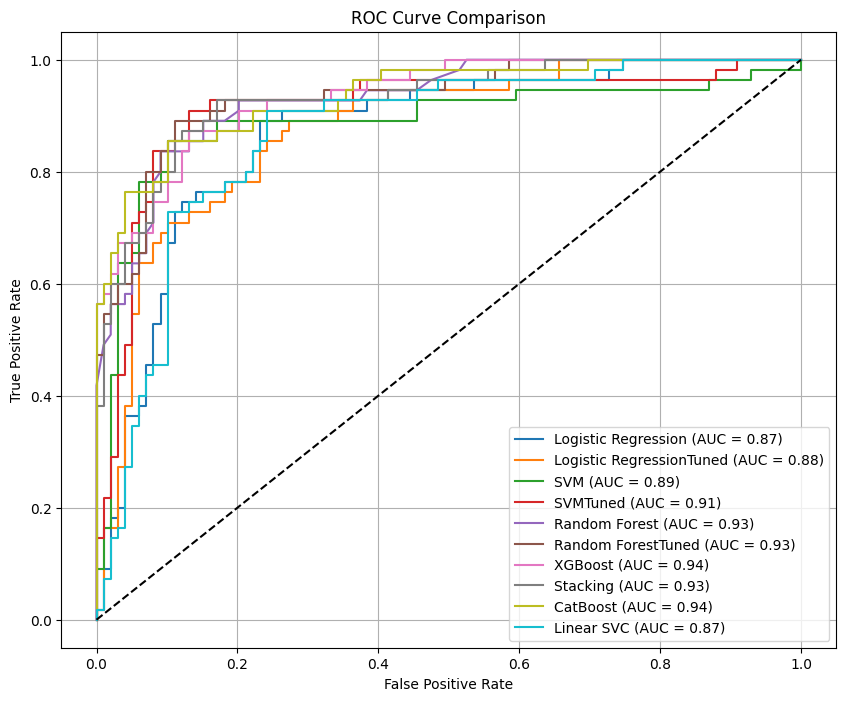

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

models = {
    "Logistic Regression": log_reg,
    "Logistic RegressionTuned":grid_lr ,
    "SVM": svm_model,
    "SVMTuned": grid_svm,
    "Random Forest": rf_model,
    'Random ForestTuned': grid_rf,
    "XGBoost": xgb_model,
    "Stacking": stacking_clf,
    "CatBoost" : cat_model,
    'Linear SVC': grid_svc
}

plt.figure(figsize=(10, 8))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(X_test_s)[:, 1]
    else:
        y_pred_prob = model.decision_function(X_test_s)
        y_pred_prob = (y_pred_prob - y_pred_prob.min()) / (y_pred_prob.max() - y_pred_prob.min())
    
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc_score = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [119]:
from sklearn.metrics import precision_score, recall_score, f1_score

results = []

for name, model in models.items():
    y_pred = model.predict(X_test_s)
    
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(X_test_s)[:, 1]
    else:
        y_pred_prob = model.decision_function(X_test_s)
        y_pred_prob = (y_pred_prob - y_pred_prob.min()) / (y_pred_prob.max() - y_pred_prob.min())
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)
    
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1,
        "AUC": auc
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

print(results_df)


                      Model  Accuracy  Precision    Recall  F1-score       AUC
0                  Stacking  0.876623   0.810345  0.854545  0.831858  0.929109
1        Random ForestTuned  0.876623   0.810345  0.854545  0.831858  0.933150
2                  CatBoost  0.876623   0.821429  0.836364  0.828829  0.935170
3                       SVM  0.870130   0.830189  0.800000  0.814815  0.887420
4             Random Forest  0.863636   0.793103  0.836364  0.814159  0.930119
5                   XGBoost  0.850649   0.785714  0.800000  0.792793  0.935170
6                  SVMTuned  0.818182   0.680000  0.927273  0.784615  0.912397
7       Logistic Regression  0.818182   0.736842  0.763636  0.750000  0.868871
8                Linear SVC  0.805195   0.666667  0.909091  0.769231  0.867218
9  Logistic RegressionTuned  0.766234   0.620253  0.890909  0.731343  0.876768


C:\Users\DELL\AppData\Local\Temp\ipykernel_1960\114214048.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")


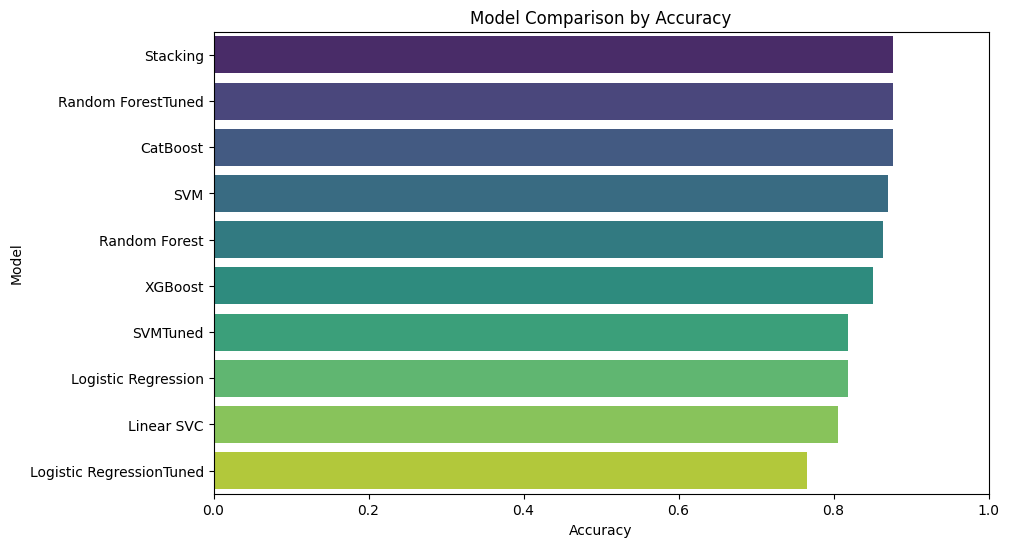

In [120]:
plt.figure(figsize=(10,6))
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")
plt.title("Model Comparison by Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.xlim(0,1)
plt.show()

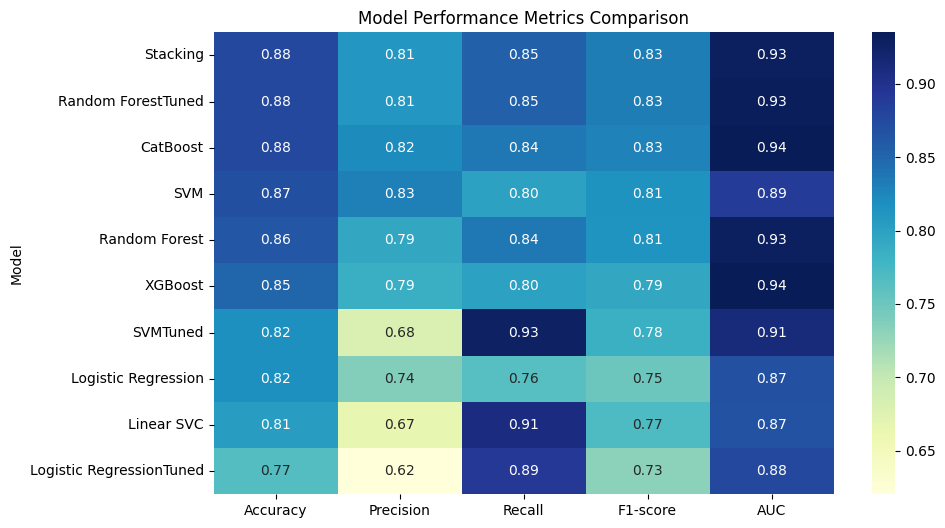

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(results_df.set_index("Model"), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Model Performance Metrics Comparison")
plt.savefig("model_performance_comparison.png", bbox_inches='tight') 
plt.show()


### **Model Evaluation Table**

| Model                   | Accuracy | Precision | Recall  | F1-score |   AUC   |
| ----------------------- | -------- | --------- | ------- | -------- | ------- |
| Stacking                | 0.877    | 0.810     | 0.855   | 0.832    | 0.929   |
| Random Forest Tuned     | 0.877    | 0.810     | 0.855   | 0.832    | 0.933   |
| CatBoost                | 0.877    | 0.821     | 0.836   | 0.829    | 0.935   |
| SVM                     | 0.870    | 0.830     | 0.800   | 0.815    | 0.887   |
| Random Forest           | 0.864    | 0.793     | 0.836   | 0.814    | 0.930   |
| XGBoost                 | 0.851    | 0.786     | 0.800   | 0.793    | 0.935   |
| SVM Tuned               | 0.818    | 0.680     | 0.927   | 0.785    | 0.912   |
| Logistic Regression     | 0.818    | 0.737     | 0.764   | 0.750    | 0.869   |
| Linear SVC              | 0.805    | 0.667     | 0.909   | 0.769    | 0.867   |
| Logistic RegressionTuned| 0.766    | 0.620     | 0.891   | 0.731    | 0.877   |


### **Observations:**
- `SVM Tuned` achieved the **highest Recall (0.927)**, which is very important in medical contexts where reducing false negatives is critical.  
- `CatBoost` achieved the **highest AUC (0.935)**, showing strong discriminative ability.  
- `Stacking` and `Random Forest Tuned` both reached the **highest Accuracy (0.877)** with balanced Precision/Recall.  
- `Linear SVC` also gave strong Recall (0.909), but with slightly lower Accuracy.  
- The final model choice should depend on whether the priority is **overall balance (Stacking / RF Tuned)** or **maximizing Recall (SVM Tuned / Linear SVC)**.  


## phase 5: Prediction Engine

This allows predicting new patients’ diabetes risk using engineered features

In [ ]:
## Launch The Prediction Engine
def predict_diabetes_final(new_patient, model=grid_svm, scaler=scaler):
    """
    Predicts diabetes for a new patient.

    new_patient: dict containing only the basic features:
    'Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'
    """
    # Feature engineering
    new_patient['Glucose_BMI'] = new_patient['Glucose'] * new_patient['BMI']
    new_patient['Glucose_squared'] = new_patient['Glucose'] ** 2
    new_patient['BMI_squared'] = new_patient['BMI'] ** 2
    new_patient['Glucose_Age'] = new_patient['Glucose'] * new_patient['Age']
    new_patient['BMI_DPF'] = new_patient['BMI'] * new_patient['DiabetesPedigreeFunction']

    new_patient['insulin_glucose'] = (
        new_patient['Glucose'] * new_patient['Insulin'] if new_patient['Glucose'] != 0 else 0
    )
    new_patient['Insulin_Glucose_Ratio'] = (
        new_patient['Insulin'] / new_patient['Glucose'] if new_patient['Glucose'] != 0 else 0
    )
    new_patient['Insulin_BMI_Ratio'] = (
        new_patient['Insulin'] / new_patient['BMI'] if new_patient['BMI'] != 0 else 0
    )
    new_patient['Pregnancies_per_Year'] = (
        new_patient['Pregnancies'] / new_patient['Age'] if new_patient['Age'] != 0 else 0
    )

    # Build dataframe in same order as X_train
    df_patient = pd.DataFrame([new_patient], columns=X_train.columns)

    # Replace inf values
    df_patient = df_patient.replace([np.inf, -np.inf], np.nan)

    # Impute NaN values with median from X_train
    # Impute NaN values with median from X_train
    for col in df_patient.columns:
        if df_patient[col].isna().any():
            if col in X_train.columns:
                median_val = X_train[col].median()
                df_patient[col] = df_patient[col].fillna(median_val)
            else:
                df_patient[col] = df_patient[col].fillna(0)


    # Scale
    data_scaled = scaler.transform(df_patient)

    # Predict
    pred = model.predict(data_scaled)[0]

    if hasattr(model, "predict_proba"):
        pred_proba = model.predict_proba(data_scaled)[0][1] * 100
        return f"Prediction: {'Diabetic' if pred==1 else 'Non-Diabetic'} (Probability: {pred_proba:.1f}%)"
    else:
        return f"Prediction: {'Diabetic' if pred==1 else 'Non-Diabetic'}"


In [ ]:
import pandas as pd
import numpy as np
np.random.seed(42)
data = {
    'Pregnancies': np.random.randint(0, 10, 10),
    'Glucose': np.random.randint(70, 250, 10),
    'Insulin': np.random.randint(15, 280, 10),
    'BMI': np.round(np.random.uniform(18, 45, 10), 1),
    'DiabetesPedigreeFunction': np.round(np.random.uniform(0.1, 2.5, 10), 2),
    'Age': np.random.randint(20, 70, 10)
}

patients_df = pd.DataFrame(data)
patients_df


,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,169,206,20.4,1.45,69
1,3,173,175,34.7,1.02,59
2,7,221,36,28.3,0.14,23
3,4,200,267,44.5,0.65,21
4,6,219,250,30.6,0.68,25
5,9,122,63,41.2,1.74,61
6,2,71,73,36.4,1.56,23
7,6,157,184,30.2,2.10,48
8,7,227,202,18.4,0.52,37
9,4,107,204,43.4,1.04,45


In [ ]:
patients_df['Prediction'] = patients_df.apply(lambda row: predict_diabetes_final(row.to_dict()), axis=1)
patients_df


,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Prediction
0,6,169,206,20.4,1.45,69,Prediction: Diabetic (Probability: 62.8%)
1,3,173,175,34.7,1.02,59,Prediction: Diabetic (Probability: 81.2%)
2,7,221,36,28.3,0.14,23,Prediction: Diabetic (Probability: 44.0%)
3,4,200,267,44.5,0.65,21,Prediction: Diabetic (Probability: 73.0%)
4,6,219,250,30.6,0.68,25,Prediction: Diabetic (Probability: 73.2%)
5,9,122,63,41.2,1.74,61,Prediction: Diabetic (Probability: 48.6%)
6,2,71,73,36.4,1.56,23,Prediction: Non-Diabetic (Probability: 24.7%)
7,6,157,184,30.2,2.10,48,Prediction: Diabetic (Probability: 64.6%)
8,7,227,202,18.4,0.52,37,Prediction: Diabetic (Probability: 64.6%)
9,4,107,204,43.4,1.04,45,Prediction: Diabetic (Probability: 82.1%)
